# Making plots for paper

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps as cm
import pandas as pd

In [2]:
df_path="/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/Data_full/Data/0000.npy"
d1_path="/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/F1/Data/0000.npy"
d2_path="/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/F2/Data/0000.npy"
d3_path="/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/F3/Data/0000.npy"
reg_d1_path=""
reg_d2_path=""

In [3]:
def get_data(path):
    df=np.load(path,allow_pickle='TRUE').item()
    data=df['data']
    print(df['hdr']['CRVAL1'])
    print(df['hdr']['CRVAL2'])
    print(df['hdr']['CRPIX1'])
    print(df['hdr']['CRPIX2'])
    print(df['hdr']['CDELT1'])
    return data

In [4]:
data_full=get_data(df_path)
r1=get_data(d1_path)
r2=get_data(d2_path)
r3=get_data(d3_path)

[-1034.02623089]
[-909.27096069]
[896.5]
[960.5]
[0.492]
[-1034.02623089]
[-909.27096069]
[896.5]
[960.5]
[0.492]
[-1034.02623089]
[-909.27096069]
[896.5]
[960.5]
[0.492]
[-1034.02623089]
[-909.27096069]
[896.5]
[960.5]
[0.492]


In [5]:
left=-1034.02623089-896.5*0.492
right=-1034.02623089+(2048-896.5)*0.492
bottom=-909.27096069-960.5*0.492
top=-909.27096069+(2048-960.5)*0.492
print(left,right,bottom,top)

-1475.10423089 -467.48823089000007 -1381.83696069 -374.2209606900001


In [6]:
left=-1034.02623089+(925-896.5)*0.492
right=-1034.02623089+(2028-896.5)*0.492
bottom=-909.27096069-960.5*0.492
top=-909.27096069+(2048-960.5)*0.492
print(left,right,bottom,top)

-1020.00423089 -477.3282308900001 -1381.83696069 -374.2209606900001


In [7]:
# [left,bottom,right,top]
r1_coords=np.array([925,282,2028,1385])
r2_coords=np.array([1,799,899,1697])
r3_coords=np.array([10,5,659,654])

In [9]:
r1_as

NameError: name 'r1_as' is not defined

In [8]:
def conv_px_as(coords):
    left = -1475.1042338181944
    right = -467.48821523978427
    bottom = -1381.8369702161904
    top = -374.2209459157343

    b, t, l, r=coords[0], coords[2], coords[1], coords[3]

    l_as=left+0.492*l
    r_as=left+0.492*r
    b_as=bottom+0.492*(b)
    t_as=bottom+0.492*(t)
    return([l_as,b_as,r_as,t_as])

In [9]:
def make_box(coords):
    l=coords[0]
    r=coords[2]
    b=coords[1]
    t=coords[3]

    x=[l,r,r,l,l]
    y=[b,b,t,t,b]
    
    return x,y

In [10]:
r1_as=conv_px_as(r1_coords)
r2_as=conv_px_as(r2_coords)
r3_as=conv_px_as(r3_coords)

In [11]:
r1_slit_path='/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/F1/Slits/slits_location_pixel.csv'
r2_slit_path='/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/F2/Slits/slits_location_pixel.csv'
r3_slit_path='/home/vampy/acads/projects/Probing_high_freq_waves_in_corona/Data/solo_L2_EUI-HRIEUV174-IMAGE_2022-10-13T13:06:00_2022-10-13T14:35:51/F3/Slits/slits_location_pixel.csv'

In [12]:
r1_sl=pd.read_csv(r1_slit_path,sep=',',header=0,names=["slit name","xi","yi","xf","yf","width"])
r1_slit=r1_sl.to_numpy()
r2_sl=pd.read_csv(r2_slit_path,sep=',',header=0,names=["slit name","xi","yi","xf","yf","width"])
r2_slit=r2_sl.to_numpy()
r3_sl=pd.read_csv(r3_slit_path,sep=',',header=0,names=["slit name","xi","yi","xf","yf","width"])
r3_slit=r3_sl.to_numpy()

In [13]:
print(r1_slit)
print(r2_slit)
print(r3_slit)

[['G1' 216 988 395 891 5]
 ['G2' 309 1021 334 1055 5]
 ['G3' 241 864 170 758 5]
 ['G4' 528 891 709 791 5]
 ['G5' 207 300 251 162 5]
 ['G6' 886 134 998 81 5]]
[['G7' 538 752 478 691 5]
 ['G8' 331 590 499 689 5]
 ['G9' 578 698 624 482 5]
 ['G10' 147 372 163 207 5]
 ['G11' 86 790 143 725 5]
 ['G12' 375 451 522 429 5]]
[['G13' 293 558 261 503 5]
 ['G14' 272 511 270 396 5]
 ['G15' 301 507 291 461 5]]


In [14]:
slit_name=['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12','G13','G14','G15','G16']

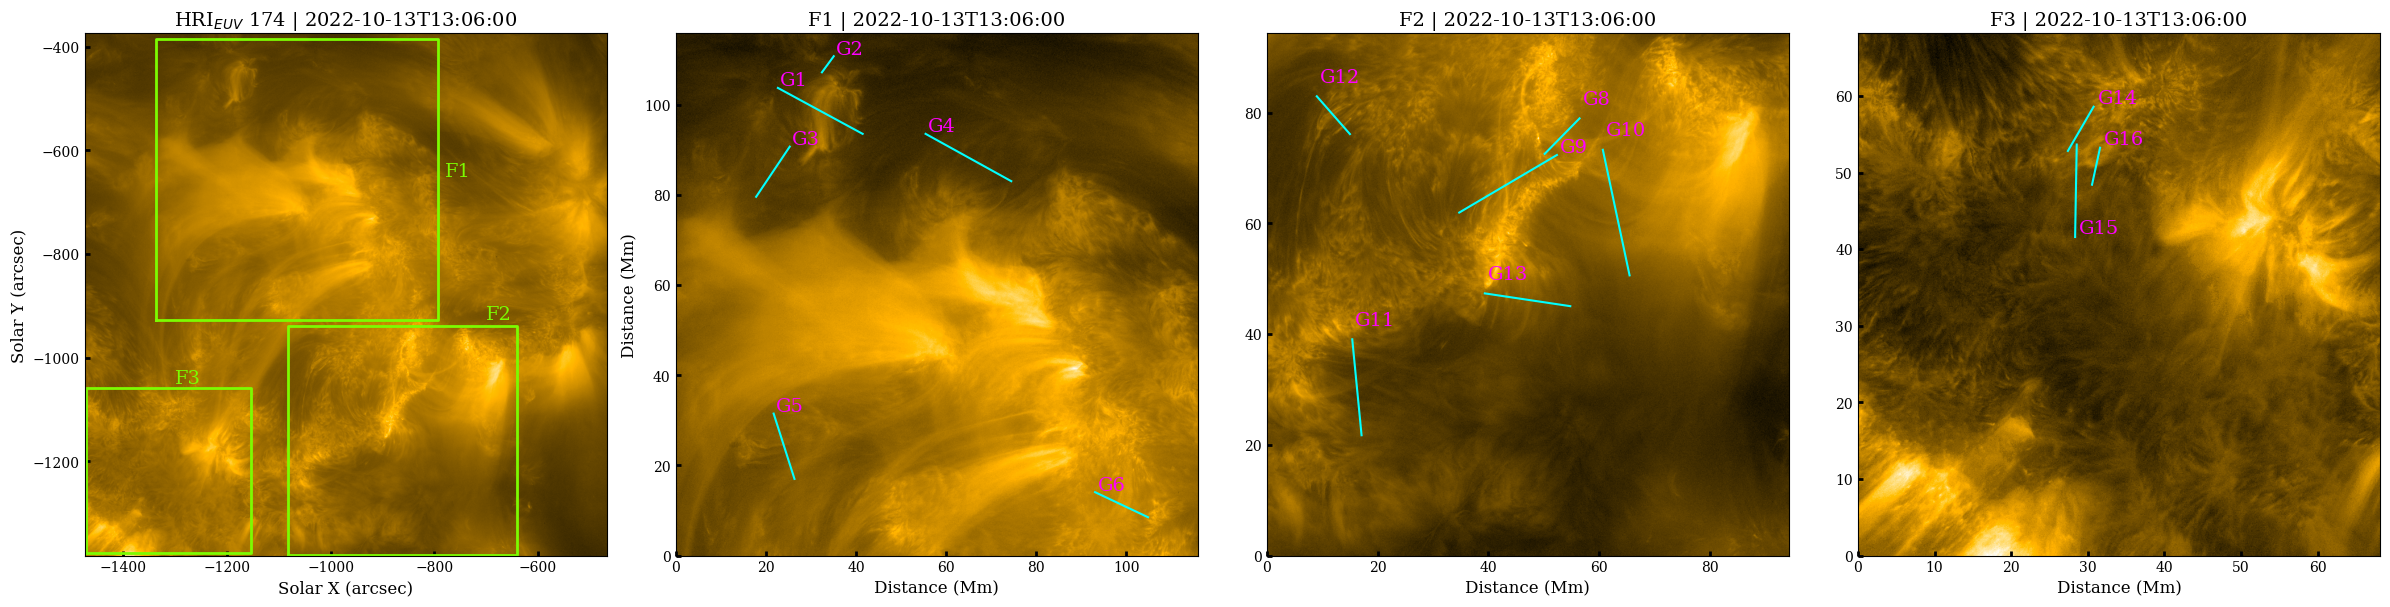

In [17]:
cmap= matplotlib.colormaps['sdoaia171']
matplotlib.rcParams['font.family'] = 'serif'

# Create a figure and a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(24,8))  # Adjust figsize as needed

# Plotting the Data full with the arc-second axis label
left = -1475.1042338181944
right = -467.48821523978427
bottom = -1381.8369702161904
top = -374.2209459157343

axes[0].imshow(data_full**0.2,extent=[left,right,bottom,top],origin='lower',cmap=cmap)
axes[0].set_xlabel('Solar X (arcsec)',fontsize=12)
axes[0].set_ylabel('Solar Y (arcsec)',fontsize=12)
r1_box=make_box(r1_as)
axes[0].plot(r1_box[0],r1_box[1],linewidth=2,color='lawngreen')
r2_box=make_box(r2_as)
axes[0].plot(r2_box[0],r2_box[1],linewidth=2,color='lawngreen')
r3_box=make_box(r3_as)
axes[0].plot(r3_box[0],r3_box[1],linewidth=2,color='lawngreen')
# axes[0].scatter(test[0],test[1],color='red',s=500)
axes[0].set_title(r'HRI$_{EUV}$ 174 | 2022-10-13T13:06:00',fontsize=14)
axes[0].tick_params(axis='both', direction='in', which='both',width=2)
axes[0].text(-780,-650,'F1',color='lawngreen',fontsize=14)
axes[0].text(-700,-925,'F2',color='lawngreen',fontsize=14)
axes[0].text(-1300,-1050,'F3',color='lawngreen',fontsize=14)

# Plotting the R1 Data in megameters axis label
scale=0.105
left=0
right=np.shape(r1)[0]*scale
top=np.shape(r1)[1]*scale
# right=np.shape(data1)[0]
# top=np.shape(data1)[1]
bottom=0

axes[1].imshow(r1**0.2,origin='lower',extent=[left,right,bottom,top],cmap=cmap)
axes[1].set_xlabel('Distance (Mm)',fontsize=12)
axes[1].set_ylabel('Distance (Mm)',fontsize=12)
axes[1].set_title(r'F1 | 2022-10-13T13:06:00',fontsize=14)
axes[1].tick_params(axis='both', direction='in', which='both',width=2)
for i in range(np.shape(r1_slit)[0]):
    if slit_name[i]=='G2':
        axes[1].plot([r1_slit[i][1]*scale,r1_slit[i][3]*scale],[r1_slit[i][2]*scale,r1_slit[i][4]*scale],c="cyan")
        axes[1].text(r1_slit[i][3]*scale+5*scale,r1_slit[i][4]*scale+5*scale,slit_name[i],c='magenta',fontsize=14)
    else:
        axes[1].plot([r1_slit[i][1]*scale,r1_slit[i][3]*scale],[r1_slit[i][2]*scale,r1_slit[i][4]*scale],c="cyan")
        axes[1].text(r1_slit[i][1]*scale+5*scale,r1_slit[i][2]*scale+5*scale,slit_name[i],c='magenta',fontsize=14)

# Plotting the R2 Data in megameters axis label
scale=0.105
left=0
right=np.shape(r2)[0]*scale
top=np.shape(r2)[1]*scale
# right=np.shape(data1)[0]
# top=np.shape(data1)[1]
bottom=0

axes[2].imshow(r2**0.2,origin='lower',extent=[left,right,bottom,top],cmap=cmap)
axes[2].set_xlabel('Distance (Mm)',fontsize=12)
# axes[2].set_ylabel('Distance (Mm)',fontsize=12)
axes[2].set_title(r'F2 | 2022-10-13T13:06:00',fontsize=14)
axes[2].tick_params(axis='both', direction='in', which='both',width=2)
for i in range(np.shape(r2_slit)[0]):
    if slit_name[i+7]=='G9':
        axes[2].plot([r2_slit[i][1]*scale,r2_slit[i][3]*scale],[r2_slit[i][2]*scale,r2_slit[i][4]*scale],c="cyan")
        axes[2].text(r2_slit[i][3]*scale+5*scale,r2_slit[i][4]*scale+5*scale,slit_name[i+7],c='magenta',fontsize=14)
    else:
        axes[2].plot([r2_slit[i][1]*scale,r2_slit[i][3]*scale],[r2_slit[i][2]*scale,r2_slit[i][4]*scale],c="cyan")
        axes[2].text(r2_slit[i][1]*scale+5*scale,r2_slit[i][2]*scale+25*scale,slit_name[i+7],c='magenta',fontsize=14)

# Plotting the R3 Data in megameters axis label
scale=0.105
left=0
right=np.shape(r3)[0]*scale
top=np.shape(r3)[1]*scale
# right=np.shape(data1)[0]
# top=np.shape(data1)[1]
bottom=0

axes[3].imshow(r3**0.2,origin='lower',extent=[left,right,bottom,top],cmap=cmap)
axes[3].set_xlabel('Distance (Mm)',fontsize=12)
# axes[3].set_ylabel('Distance (Mm)',fontsize=12)
axes[3].set_title(r'F3 | 2022-10-13T13:06:00',fontsize=14)
axes[3].tick_params(axis='both', direction='in', which='both',width=2)
for i in range(np.shape(r3_slit)[0]):
    if slit_name[i+13]=='G15':
        axes[3].plot([r3_slit[i][1]*scale,r3_slit[i][3]*scale],[r3_slit[i][2]*scale,r3_slit[i][4]*scale],c="cyan")
        axes[3].text(r3_slit[i][3]*scale+5*scale,r3_slit[i][4]*scale+5*scale,slit_name[i+13],c='magenta',fontsize=14)
    else:
        axes[3].plot([r3_slit[i][1]*scale,r3_slit[i][3]*scale],[r3_slit[i][2]*scale,r3_slit[i][4]*scale],c="cyan")
        axes[3].text(r3_slit[i][1]*scale+5*scale,r3_slit[i][2]*scale+5*scale,slit_name[i+13],c='magenta',fontsize=14)


plt.tight_layout()

# Display the plot
# plt.show()
plt.savefig("data_2.pdf",dpi=600)

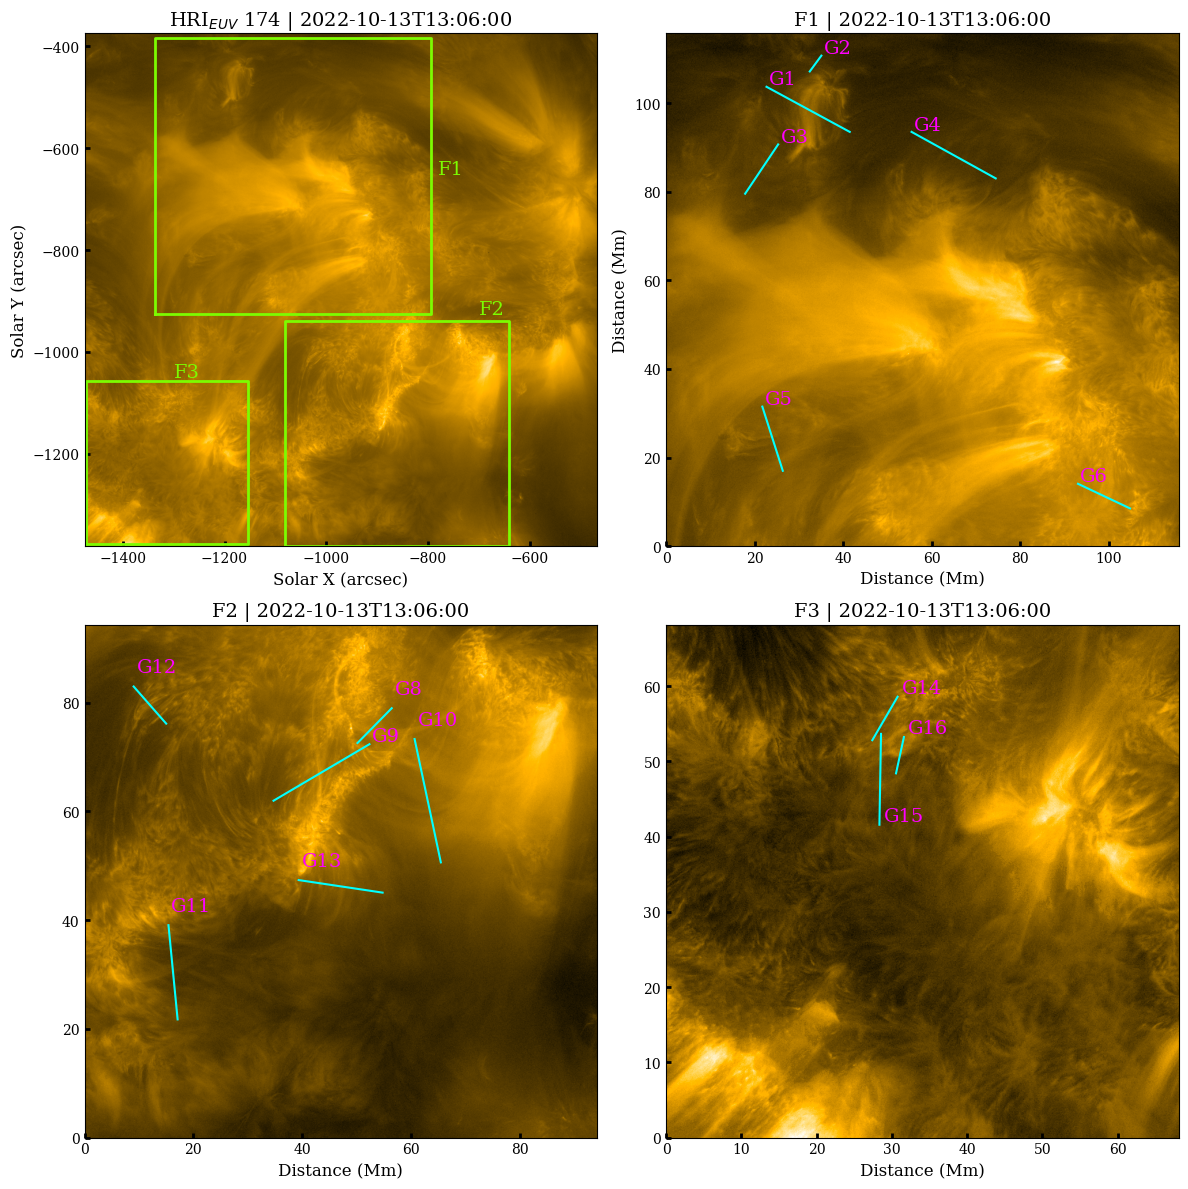

In [17]:
cmap= matplotlib.colormaps['sdoaia171']
matplotlib.rcParams['font.family'] = 'serif'

# Create a figure and a 1x4 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12,12))  # Adjust figsize as needed

# Plotting the Data full with the arc-second axis label
left = -1475.1042338181944
right = -467.48821523978427
bottom = -1381.8369702161904
top = -374.2209459157343

axes[0,0].imshow(data_full**0.2,extent=[left,right,bottom,top],origin='lower',cmap=cmap)
axes[0,0].set_xlabel('Solar X (arcsec)',fontsize=12)
axes[0,0].set_ylabel('Solar Y (arcsec)',fontsize=12)
r1_box=make_box(r1_as)
axes[0,0].plot(r1_box[0],r1_box[1],linewidth=2,color='lawngreen')
r2_box=make_box(r2_as)
axes[0,0].plot(r2_box[0],r2_box[1],linewidth=2,color='lawngreen')
r3_box=make_box(r3_as)
axes[0,0].plot(r3_box[0],r3_box[1],linewidth=2,color='lawngreen')
# axes[0].scatter(test[0],test[1],color='red',s=500)
axes[0,0].set_title(r'HRI$_{EUV}$ 174 | 2022-10-13T13:06:00',fontsize=14)
axes[0,0].tick_params(axis='both', direction='in', which='both',width=2)
axes[0,0].text(-780,-650,'F1',color='lawngreen',fontsize=14)
axes[0,0].text(-700,-925,'F2',color='lawngreen',fontsize=14)
axes[0,0].text(-1300,-1050,'F3',color='lawngreen',fontsize=14)

# Plotting the R1 Data in megameters axis label
scale=0.105
left=0
right=np.shape(r1)[0]*scale
top=np.shape(r1)[1]*scale
# right=np.shape(data1)[0]
# top=np.shape(data1)[1]
bottom=0

axes[0,1].imshow(r1**0.2,origin='lower',extent=[left,right,bottom,top],cmap=cmap)
axes[0,1].set_xlabel('Distance (Mm)',fontsize=12)
axes[0,1].set_ylabel('Distance (Mm)',fontsize=12)
axes[0,1].set_title(r'F1 | 2022-10-13T13:06:00',fontsize=14)
axes[0,1].tick_params(axis='both', direction='in', which='both',width=2)
for i in range(np.shape(r1_slit)[0]):
    if slit_name[i]=='G2':
        axes[0,1].plot([r1_slit[i][1]*scale,r1_slit[i][3]*scale],[r1_slit[i][2]*scale,r1_slit[i][4]*scale],c="cyan")
        axes[0,1].text(r1_slit[i][3]*scale+5*scale,r1_slit[i][4]*scale+5*scale,slit_name[i],c='magenta',fontsize=14)
    else:
        axes[0,1].plot([r1_slit[i][1]*scale,r1_slit[i][3]*scale],[r1_slit[i][2]*scale,r1_slit[i][4]*scale],c="cyan")
        axes[0,1].text(r1_slit[i][1]*scale+5*scale,r1_slit[i][2]*scale+5*scale,slit_name[i],c='magenta',fontsize=14)

# Plotting the R2 Data in megameters axis label
scale=0.105
left=0
right=np.shape(r2)[0]*scale
top=np.shape(r2)[1]*scale
# right=np.shape(data1)[0]
# top=np.shape(data1)[1]
bottom=0

axes[1,0].imshow(r2**0.2,origin='lower',extent=[left,right,bottom,top],cmap=cmap)
axes[1,0].set_xlabel('Distance (Mm)',fontsize=12)
# axes[2].set_ylabel('Distance (Mm)',fontsize=12)
axes[1,0].set_title(r'F2 | 2022-10-13T13:06:00',fontsize=14)
axes[1,0].tick_params(axis='both', direction='in', which='both',width=2)
for i in range(np.shape(r2_slit)[0]):
    if slit_name[i+7]=='G9':
        axes[1,0].plot([r2_slit[i][1]*scale,r2_slit[i][3]*scale],[r2_slit[i][2]*scale,r2_slit[i][4]*scale],c="cyan")
        axes[1,0].text(r2_slit[i][3]*scale+5*scale,r2_slit[i][4]*scale+5*scale,slit_name[i+7],c='magenta',fontsize=14)
    else:
        axes[1,0].plot([r2_slit[i][1]*scale,r2_slit[i][3]*scale],[r2_slit[i][2]*scale,r2_slit[i][4]*scale],c="cyan")
        axes[1,0].text(r2_slit[i][1]*scale+5*scale,r2_slit[i][2]*scale+25*scale,slit_name[i+7],c='magenta',fontsize=14)

# Plotting the R3 Data in megameters axis label
scale=0.105
left=0
right=np.shape(r3)[0]*scale
top=np.shape(r3)[1]*scale
# right=np.shape(data1)[0]
# top=np.shape(data1)[1]
bottom=0

axes[1,1].imshow(r3**0.2,origin='lower',extent=[left,right,bottom,top],cmap=cmap)
axes[1,1].set_xlabel('Distance (Mm)',fontsize=12)
# axes[3].set_ylabel('Distance (Mm)',fontsize=12)
axes[1,1].set_title(r'F3 | 2022-10-13T13:06:00',fontsize=14)
axes[1,1].tick_params(axis='both', direction='in', which='both',width=2)
for i in range(np.shape(r3_slit)[0]):
    if slit_name[i+13]=='G15':
        axes[1,1].plot([r3_slit[i][1]*scale,r3_slit[i][3]*scale],[r3_slit[i][2]*scale,r3_slit[i][4]*scale],c="cyan")
        axes[1,1].text(r3_slit[i][3]*scale+5*scale,r3_slit[i][4]*scale+5*scale,slit_name[i+13],c='magenta',fontsize=14)
    else:
        axes[1,1].plot([r3_slit[i][1]*scale,r3_slit[i][3]*scale],[r3_slit[i][2]*scale,r3_slit[i][4]*scale],c="cyan")
        axes[1,1].text(r3_slit[i][1]*scale+5*scale,r3_slit[i][2]*scale+5*scale,slit_name[i+13],c='magenta',fontsize=14)


plt.tight_layout()

# Display the plot
#plt.show()
plt.savefig("data_2.png",dpi=600)

In [ ]:
# Making XT-map
# selected slits are
# R2_S4
# R1_S1
# R3_S2